# More Logistic Regression

Recap:

- Model: $f_w(x) = g(z)$, where

    $z = w \cdot x$, and
    
    $g(z) = \dfrac{1}{1+e^{-z}} = \dfrac{1}{1+e^{-w\cdot x}}$
    
- Like linear regression, we will have a training set with $m$ examples $x^{(1)}$ through $x^{(m)}$,
and each example $x^{(i)}$ has $n$ different features, $x^{(i)}_1$ through $x^{(i)}_n$.

- We also have the "fake" feature $x_0$, which is always 1.

- We have a vector $\boldsymbol{w}$ of length $n$, so there is one weight per feature.

$$\boldsymbol{w} = [w_0, w_1, \ldots, w_n]^T$$

- The target, $y$, is always 0 or 1.

## Review the cost function for linear regression

- For linear regression, our cost function was:

$$J(\boldsymbol{w}) = \frac{1}{m}\sum_{i=1}^m \frac{1}{2} \left( f_\boldsymbol{w}(x^{(i)}) - y^{(i)} \right)^2$$

- The only difference is that we put the 1/2 inside the summation, for reasons we'll see soon.

- In linear regression, where $f_\boldsymbol{w}(x) = w \cdot x$,  this **squared error cost function** always results in a convex curve (a bowl shape) with one global minimum.

- In logistic regression, if we change the definition of $f$ to $f(x) =  \dfrac{1}{1+e^{-w\cdot x}}$, what will happen is that the cost curve $J(w)$ no longer has a single global minimum.

## COMMENT

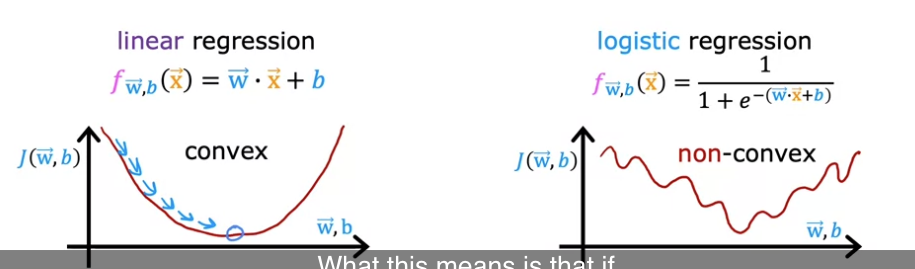

- So the squared error cost function is not a good choice for logistic regression.

- Instead we will define a different cost function that makes more sense in this context,
and will give us a smooth curve for $J$ with a global minimum.  (And therefore we will be able
to use gradient descent to find this minimum!)

# Redo-ing notation a little bit

We're going to give a special name to a specific piece of our cost function $J$ and call it the **loss function**:

$$\text{loss function: } L \left( f_w(x^{(i)}), y^{(i)} \right)$$

This function is designed to measure the **loss on a single training example**.  That is why it is
defined as a function of the output prediction $f_w(x^{(i)})$ (in other words, $\hat{y}^{(i)}$, and the "true" $y$-value, 
$y^{(i)}$.  We will define
this function differently for different machine learning algorithms.

In linear regression, we define 
$$L \left( f_w(x^{(i)}), y^{(i)} \right) = \dfrac{1}{2}\left( f_\boldsymbol{w}(x^{(i)}) - y^{(i)} \right)^2$$

In logistic regression, we define

$$L \left( f_w(x^{(i)}), y^{(i)} \right) = 
    \begin{cases}
        -\log\left( f_w(x^{(i)}) \right) & \text{if } y^{(i)}=1 \\ 
        -\log\left( 1-f_w(x^{(i)}) \right) & \text{if } y^{(i)}=0
    \end{cases}$$
    
The reasoning behind this is as follows:

- If $y=1$, then we use $-\log\left( f_w(x^{(i)}) \right)$ because that expression results in 0 when $f_w(x^{(i)}) = 1$, and very large numbers as 
$f_w(x^{(i)})$ approaches 0.

-  If $y=0$, then we use $-\log\left(1- f_w(x^{(i)}) \right)$ because that expression results in 0 when $f_w(x^{(i)}) = 0$, and very large numbers as 
$f_w(x^{(i)})$ approaches 1.

- Overall, with this loss function, the further the prediction $\hat{y}=f(x)$ is
from the target $y$, the higher the loss.

## COMMENT ON RATIONALE**

The rationale behind this loss function is as follows:

- If $y=1$:

Here is log(f):

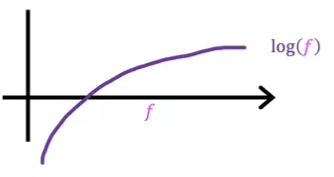

Here is -log(f):

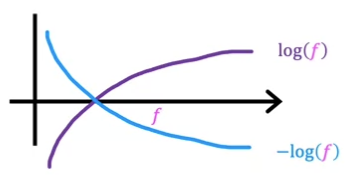

Because f is always between 0 and 1, we only care about this:

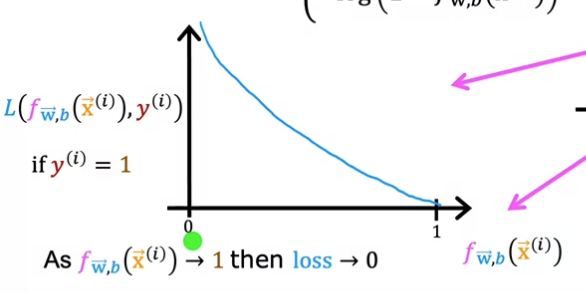

- If $y=0$:

Here is -log(1-f):

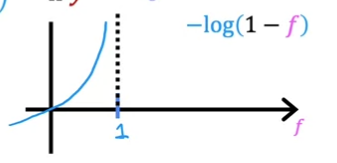

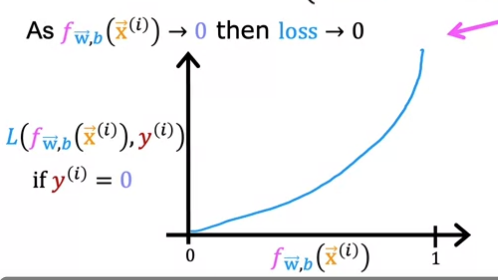

## Putting it together

So for logistic regression, we will rewrite the cost function $J$ like this:

$$J(\boldsymbol{w}) = \frac{1}{m}\sum_{i=1}^m L \left( 
    f_\boldsymbol{w}(x^{(i)}), y^{(i)} \right)$$
    
with the loss function $L$ defined as:

$$L \left( f_w(x^{(i)}), y^{(i)} \right) = 
    \begin{cases}
        -\log\left( f_w(x^{(i)}) \right) & \text{if } y^{(i)}=1 \\ 
        -\log\left( 1-f_w(x^{(i)}) \right) & \text{if } y^{(i)}=0
    \end{cases}$$
    
(and don't forget, our model $f$ is:)

  $$f_{w}(x) = g(w \cdot x) = \dfrac{1}{1+e^{-w \cdot x}}$$
    
Using our new choice of loss function, the overall cost function $J$ is now
convex (just like it is for linear regression), and therefore we can apply
gradient descent to it to find the global minimum.

### Simplifying

In fact, there's a way to combine the two pieces of the loss function together:

$$L \left( f_w(x^{(i)}), y^{(i)} \right) = 
        -y^{(i)}\log\left( f_w(x^{(i)}) \right)-
        (1-y^{(i)})\log\left( 1-f_w(x^{(i)}) \right)$$
        
Try substituting in $y^{(i)}=0$ or 1 into the equation above and 
notice how each piece simplifies to either the top or bottom part of
the piecewise definition of $L$ from earlier.

<HR>
    
Then, we can rewrite $J$ as:
    
$$J(\boldsymbol{w}) = \frac{1}{m}\sum_{i=1}^m L \left( 
    f_\boldsymbol{w}(x^{(i)}), y^{(i)} \right)$$
    
(substitute in our new definition for $L$, and we get)
    
$$J(\boldsymbol{w}) = -\frac{1}{m}\sum_{i=1}^m  \left[ y^{(i)}\log\left( f_w(x^{(i)}) \right)+
        (1-y^{(i)})\log\left( 1-f_w(x^{(i)}) \right) \right]$$

### Where does this particular function come from?

There are many cost functions we could have chosen; why this one?  It turns
out that this function is derived from a statistical principle called
maximum likelihood estimation, which you don't need to know about right now, but
will give us the convex-ness that we want in a cost function.

## Gradient descent for logistic regression

Given:

- Model: $$f_{w}(x) = g(w \cdot x) = \dfrac{1}{1+e^{-w \cdot x}}$$

- Cost function: $$J(\boldsymbol{w}) = -\frac{1}{m}\sum_{i=1}^m  \left[ y^{(i)}\log\left( f_w(x^{(i)}) \right)+
        (1-y^{(i)})\log\left( 1-f_w(x^{(i)}) \right) \right]$$
        
- Goal: Find vector $\boldsymbol{w}$ that  minimizes $J(w)$.

Recall that the general equations for 
gradient descent are:

$$w_j = w_j - \alpha \cdot \dfrac{\partial}{\partial w_j} J(\boldsymbol{w})$$

Remember that this equation above is actually a bunch of equations,
one for each $w_j$.

This might look slightly different than for linear regression, but
it's because we no longer have the $b$ parameter; it became $w_0$.

### Skipping the math for now...

When we take the partial derivative above, we get:

$$\dfrac{\partial}{\partial w_j} J(\boldsymbol{w}) =  \frac{1}{m} \sum_{i=1}^m  \left( f_{w}(x^{(i)}) - y^{(i)} \right)  x^{(i)}_j$$

So the complete update equation for gradient descent becomes:

$$w_j = w_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m  \left( f_{w}(x^{(i)}) - y^{(i)} \right)  x^{(i)}_j$$

### That looks weird...

This equation is exactly the same update equation we had for linear regression!

However, this is just a coincidence: the equations are not actually the same, because the function $f$ is different.

Linear regression used $f(x) = w \cdot x$  (note the dot product)

Logistic regression uses $f(x) = \sigma(w \cdot x) = \dfrac{1}{1+e^{-w \cdot x}}$ (still uses the dot product)

However, all the same concepts for logistic regression still apply, like how to pick $\alpha$,
the learning curve, checking for convergence, etc.

## Vectorized version:

$$\boldsymbol{w_\text{new}} = \boldsymbol{w_\text{old}} - \alpha \nabla J(\boldsymbol{w})$$

$$\begin{align*}
\boldsymbol{w_\text{new}} &= \boldsymbol{w_\text{old}} - \alpha \frac{1}{m}X^T(\sigma(X\boldsymbol{w})-\boldsymbol{y})
\end{align*}$$

## Notes

- Feature scaling also applies to logistic regression and will help gradient descent
converge faster.